# Hyperparameters Tuning 

for K-means, DBSCAN and mean-shift

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.metrics import silhouette_samples
#
from sklearn.model_selection import ParameterGrid
#
from sklearn.cluster import KMeans, DBSCAN,MeanShift

In [3]:
drivers_df= pd.read_csv('datasets/driver_details.csv')
drivers_df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
drivers_df.shape

(4000, 3)

In [5]:
drivers_df.isnull().sum()

Driver_ID           0
Distance_Feature    0
Speeding_Feature    0
dtype: int64

In [6]:
drivers_df.describe()

,Driver_ID,Distance_Feature,Speeding_Feature
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [7]:
drivers_df_featuers= drivers_df.drop('Driver_ID',axis=1)

## Hyperparameter tuning for Kmean

In [8]:
parameters= {
    'n_clusters':[2,3,4,5,10,20,30]
}

parameter_grid= ParameterGrid(parameters)

In [9]:
best_score=-1
model= KMeans()



In [10]:
for g in parameter_grid:
    model.set_params(**g)

    model.fit(drivers_df_featuers)

    ss= metrics.silhouette_score(drivers_df_featuers,model.labels_)
    print(f"Parameters : {g} , Score : {ss}")

    if ss > best_score:
        best_score= ss
        best_grid= g

Parameters : {'n_clusters': 2} , Score : 0.8490223286225532
Parameters : {'n_clusters': 3} , Score : 0.6143609740599659
Parameters : {'n_clusters': 4} , Score : 0.4201612431481164
Parameters : {'n_clusters': 5} , Score : 0.5638102771811327
Parameters : {'n_clusters': 10} , Score : 0.43575848108191656
Parameters : {'n_clusters': 20} , Score : 0.3538653647300944
Parameters : {'n_clusters': 30} , Score : 0.3409457442726351


In [11]:
best_score , best_grid

(np.float64(0.8490223286225532), {'n_clusters': 2})

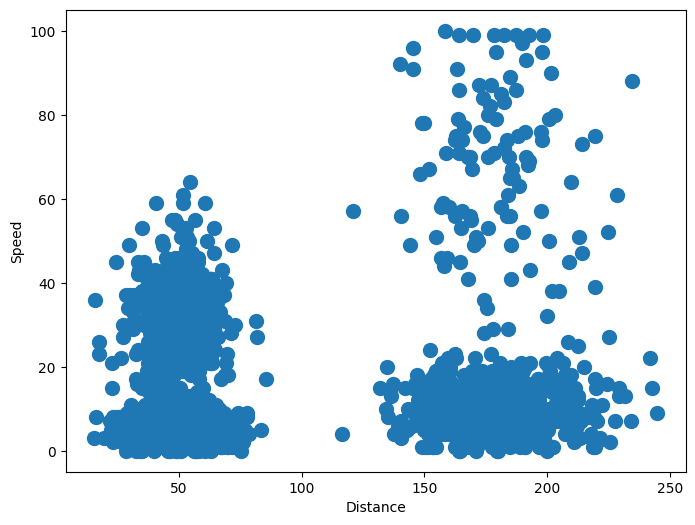

In [14]:
fig ,ax= plt.subplots(figsize=(8,6))

plt.scatter(drivers_df_featuers['Distance_Feature'], drivers_df_featuers['Speeding_Feature'],s=100)


plt.xlabel("Distance")
plt.ylabel("Speed")
plt.show()

## Hyperparameter Tuning DSCAN 

In [19]:
parameters= {
    'eps':[0.9,1.0,5.0,10.0,12.0,14.0,20.0],
    'min_samples':[5,7,10,12]
}

parameter_grid= ParameterGrid(parameters)

In [20]:
best_score= -1
model= DBSCAN()

In [21]:
for g in parameter_grid:
    model.set_params(**g)
    model.fit(drivers_df_featuers)

    ss= metrics.silhouette_score(drivers_df_featuers,model.labels_)
    
    print(f"Parameters: {g}, Score : {ss}")

    if ss > best_score:
        best_score= ss
        best_grid= g

Parameters: {'eps': 0.9, 'min_samples': 5}, Score : -0.6057173612292268
Parameters: {'eps': 0.9, 'min_samples': 7}, Score : -0.4265046999507063
Parameters: {'eps': 0.9, 'min_samples': 10}, Score : -0.39254168253371013
Parameters: {'eps': 0.9, 'min_samples': 12}, Score : -0.4286838741223884
Parameters: {'eps': 1.0, 'min_samples': 5}, Score : -0.6155746493060738
Parameters: {'eps': 1.0, 'min_samples': 7}, Score : -0.41637001640330673
Parameters: {'eps': 1.0, 'min_samples': 10}, Score : -0.3837814631696031
Parameters: {'eps': 1.0, 'min_samples': 12}, Score : -0.38648235283744914
Parameters: {'eps': 5.0, 'min_samples': 5}, Score : 0.31011275260225
Parameters: {'eps': 5.0, 'min_samples': 7}, Score : 0.7820011223700856
Parameters: {'eps': 5.0, 'min_samples': 10}, Score : 0.7974222681120255
Parameters: {'eps': 5.0, 'min_samples': 12}, Score : 0.7914367881923341
Parameters: {'eps': 10.0, 'min_samples': 5}, Score : 0.7598056658175874
Parameters: {'eps': 10.0, 'min_samples': 7}, Score : 0.815757

In [22]:
best_score, best_grid

(np.float64(0.8490223286225532), {'eps': 20.0, 'min_samples': 5})

In [23]:
model.set_params(**best_grid)
model.fit(drivers_df_featuers)

DBSCAN(eps=20.0)

In [24]:
len(model.labels_)

4000

In [ ]:
# let's get the numberf of clusters
n_clusters= len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_clusters

2

In [26]:
# now let's count the number of noisy points 

n_noise= list(model.labels_).count(-1)
n_noise

0

In [28]:
another_grid= {
    'eps':5.0,
    'min_samples':5
}

model.set_params(**another_grid)
model.fit(drivers_df_featuers)

n_clusters= len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
print(f"Number of Clusters : {n_clusters}")

n_noise= list(model.labels_).count(-1)
print(f"Noise : {n_noise}")

Number of Clusters : 7
Noise : 117


with smaller values of eps there are many more clusters and many more noisy points

In [29]:
another_grid= {
    'eps':5.0,
    'min_samples':7
}

model.set_params(**another_grid)
model.fit(drivers_df_featuers)

n_clusters= len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
print(f"Number of Clusters : {n_clusters}")

n_noise= list(model.labels_).count(-1)
print(f"Noise : {n_noise}")

Number of Clusters : 3
Noise : 157


## Hyperparameter Tuning for mean-shift

In [30]:
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(drivers_df_featuers)

np.float64(33.960524729584314)

In [31]:
model= MeanShift(bandwidth=estimate_bandwidth(drivers_df_featuers)).fit(drivers_df_featuers)

metrics.silhouette_score(drivers_df_featuers,model.labels_)

np.float64(0.8231396834167266)